In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [15]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

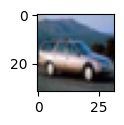

In [16]:
plot_sample(4)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [20]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [22]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 130s 83ms/step - loss: 1.8128 - accuracy: 0.3523
2min 14s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 128s 82ms/step - loss: 1.8091 - accuracy: 0.3555
2min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
